# Wrangling and Analysing Data Project
## By Ketan Ramaneti


## Project Tasks:

* Data wrangling, which consists of: Gathering data, Assessing data and Cleaning data

* Storing, analyzing, and visualisation of wrangled data

* Report on 1) data wrangling efforts and 2) data analyses and visualizations



In [77]:
# Import packages
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
import tweepy

from datetime import datetime
from functools import reduce
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

%matplotlib inline

# Gathering Data

In [78]:
# Load the dataset given
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [79]:
# gather the image predictions file from the given URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [80]:
response

<Response [200]>

In [81]:
# Load the image predictions file
imgesdf = pd.read_csv('image_predictions.tsv', sep = '\t')
imgesdf.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [82]:
# Setting up the Twitter API with authentication pieces
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth, wait_on_rate_limit=True)

### Writing tweet data to json file

* I chose to Access Project Data Without Creating a Twitter Account as given in the Project insgructions. The file tweet_json.txt is downloaded from udacity.

In [83]:
# Load the Twitter API data from tweet_json.txt
df = pd.read_json('tweet_json.txt' , lines = True)
df2=df[['id','favorite_count','retweet_count']]
df2.rename(columns = {"id": "tweet_id"}, inplace = True) 
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assessing the data of tweets

In [84]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [86]:
# Checking for duplicated tweet IDs.
df1['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [87]:
# Check if there are any records in df1 which are retweets
len(df1[df1.retweeted_status_id.isnull() == False])

181

In [88]:
sum(df1['tweet_id'].duplicated())

0

In [89]:
# Checking for number of sources
df1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [90]:
df1['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Stefan       1
Jarod        1
Kanu         1
Tanner       1
Obi          1
Name: name, Length: 957, dtype: int64

In [91]:
df1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [92]:
df1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [93]:
df1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [94]:
df1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [95]:
# Checking for name of dogs in caps
df1.loc[df1['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


* Assesing Data from the Twitter API json file.

In [96]:
df2.head()


,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [98]:
df2['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
794926597468000259    1
673705679337693185    1
673342308415348736    1
754482103782404096    1
700151421916807169    1
Name: tweet_id, Length: 2354, dtype: int64

In [99]:
# Checking for duplicated tweet IDs
sum(df2.tweet_id.duplicated())

0

* Assesing data from the image_predictions file.

In [100]:
imgesdf.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [101]:
imgesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [102]:
# Checking for duplicated tweet IDs
sum(imgesdf.tweet_id.duplicated())

0

In [103]:
imgesdf['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [104]:
imgesdf['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
traffic_light           1
killer_whale            1
walking_stick           1
maze                    1
clumber                 1
Name: p1, Length: 378, dtype: int64

In [105]:
imgesdf['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [106]:
imgesdf['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
window_shade            1
indri                   1
hatchet                 1
dock                    1
screw                   1
Name: p2, Length: 405, dtype: int64

In [107]:
imgesdf['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [108]:
imgesdf['p3'].value_counts()

Labrador_retriever      79
Chihuahua               58
golden_retriever        48
Eskimo_dog              38
kelpie                  35
                        ..
entertainment_center     1
tripod                   1
guillotine               1
theater_curtain          1
bonnet                   1
Name: p3, Length: 408, dtype: int64

In [109]:
imgesdf['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

# Detect and Clean Tidiness and Quality Issues

###### Making copies of the dataframes for cleaning


In [110]:
df1_clean = df1.copy()
df2_clean = df2.copy()
imgesdf_clean = imgesdf.copy()

## Tidiness 1 - Merge all dataframes gathered from various methods

### Code

In [111]:
# Merge the df1, df2, and imgesdf dataframes on 'tweet_id'
dfs = [df1_clean, df2_clean, imgesdf_clean]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


* Checking whther the columns have merged or not.

In [112]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

## Tidiness 2 - One column for dog stages

### Define the issue:

**Issue**: 

* 1 variable (dog stage) are entered in 4 different columns (doggo, floofer, pupper, and puppo). This is unnecessary. 
* Some Dogs have multiple dog stages described in the text. 

<br>**Solution**:

* Extract the dog stages entries from the 'text' column into the new 'dog_stage' column using regular expression then delete the 'doggo', 'floofer', 'pupper', and 'puppo' columns.

* Replace multiple dog staged with the key word 'multiple'

### Code

* Check which tweets have multiple dog stages in the text column

In [113]:
twitter.loc[(twitter[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) >1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
154,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,...,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
160,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,1,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True
366,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,1,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True
429,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,...,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
457,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,...,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
464,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,...,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True
566,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,...,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False
627,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,...,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
665,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,...,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
722,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,...,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True


* Extract the indeces of the multiple dog stages tweets and store it.

In [114]:
ind = list(twitter.loc[(twitter[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) >1].index)
ind

[154, 160, 366, 429, 457, 464, 566, 627, 665, 722, 780, 871, 917]

* Extract dog stages from 'text' column into new 'dog_stage' column 

In [115]:
twitter['dog_stage'] = twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [116]:
twitter[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


* Replace the dog_stage of stored indeces tweets with multiple dog stages.

In [117]:
for i in ind:
    twitter['dog_stage'][i] = 'multiple'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
# check whether 'multiple' has been added or not.
for i in ind:
    print(twitter.dog_stage[i])

multiple
multiple
multiple
multiple
multiple
multiple
multiple
multiple
multiple
multiple
multiple
multiple
multiple


In [119]:
# Drop doggo, floofer, pupper, and puppo columns
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [120]:
# Check for presence of 'dog_stage" and absence of 'doggo', 'floofer', 'pupper', and 'puppo'
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  favorite_count              2073 

In [121]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


## Quality issue 1 - Remove retweets

### Define

**Issue**: Data contains retweets
<br>**Solution**: Rows where 'retweeted_status_id' is a NaN will be kept (ie. if it has a value it will be removed), then the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.  

### Code

* Keep columns where 'retweeted_status_id' is NaN

In [122]:
twitter = twitter[np.isnan(twitter.retweeted_status_id)]

# Check info to determine all there are no non-null entries for 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'
print(twitter.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  favorite_count              1994 

* Remove 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns

In [123]:
twitter = twitter.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  favorite_count         1994 non-null   int64  
 11  retweet_count          1994 non-null   int64  
 12  jpg_url                1994 non-null   object 
 13  img_num                1994 non-null   int64  
 14  p1                     1994 non-null   object 
 15  p1_c

### Test

In [124]:
# Check 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns have been dropped
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  favorite_count         1994 non-null   int64  
 11  retweet_count          1994 non-null   int64  
 12  jpg_url                1994 non-null   object 
 13  img_num                1994 non-null   int64  
 14  p1                     1994 non-null   object 
 15  p1_c

## Quality issue 2 - tweet_id is an integer 

### Define

**Issue**: tweet_id is an integer.
<br>**Solution**: Change tweet_id to a string.

### Code

In [125]:
# Change 'tweet_id' to a string
twitter['tweet_id'] = twitter['tweet_id'].astype(str)

### Test

In [126]:
# Check info to confirm tweet_id has been changed from an
# integer to a string/object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  favorite_count         1994 non-null   int64  
 11  retweet_count          1994 non-null   int64  
 12  jpg_url                1994 non-null   object 
 13  img_num                1994 non-null   int64  
 14  p1                     1994 non-null   object 
 15  p1_c

## Quality issue 3 - 'timestamp' type

### Define

**Issue**: 'timestamp' is of type 'object'
<br>**Solution**: Convert 'timestamp' to a datetime object.

### Code

In [127]:
# Remove the time zone information from 'timestamp' column
twitter['timestamp'] = twitter['timestamp'].str.slice(start=0, stop=-6)

In [128]:
# Change the 'timestamp' column to a datetime object
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

### Test

In [129]:
# Confirm that 'timestamp' column is now a datetime object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1994 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              1994 non-null   datetime64[ns]
 4   source                 1994 non-null   object        
 5   text                   1994 non-null   object        
 6   expanded_urls          1994 non-null   object        
 7   rating_numerator       1994 non-null   int64         
 8   rating_denominator     1994 non-null   int64         
 9   name                   1994 non-null   object        
 10  favorite_count         1994 non-null   int64         
 11  retweet_count          1994 non-null   int64         
 12  jpg_url                1994 non-null   object        
 13  img

## Quality issues 4,5 - Issues with 'name'

### Define

**Issue**: 
1. Name has values that are the string "None" instead of NaN
2. Analysing visually using Excel sheet, there are many names that are in appropriate.
3. I also found an instand of a name being "O" instead of "O'Malley" <br>

**Solution**: Replace all inaccurate names with NaNs, and the "O" with "O'Malley".

### Code

In [130]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [131]:
# Replace all names that start with a lowercase letter with a NaN
twitter['name'].replace(lowercase_names, np.nan, inplace = True)

# Replace all 'None's with a NaN
twitter['name'].replace('None', np.nan, inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter['name'].replace('O', "O'Malley", inplace = True)

### Test

In [132]:
# Check value counts to see that None and names starting with 
twitter['name'].value_counts()

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker      9
           ..
Timison     1
Snicku      1
Kellogg     1
Grizzie     1
Obi         1
Name: name, Length: 913, dtype: int64

## Quality issue 6 - Inaccurate ratings

**Define** : Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10.

**Solution** : Find all instances of ratings that contains decimals and replace the numerator values with correct values.

#### Code:

* Obtain all text, indices, and ratings for tweets that contain a decimal in the numerator of rating

In [133]:
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())
        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [134]:
# Indeces of text with decimal ratings
ratings_with_decimals_index

[40, 558, 614, 1451]

* Change contents of 'rating_numerator' based on info found.

In [135]:
twitter.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

### Test

In [136]:
# Confirm that now dataframe contains the desired columns
twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN


## Quality issue 7 - Un-standardized ratings

### Define

**Issue**: Ratings are divided into numerator rating and denominator rating.
<br>**Solution**: Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'.

### Code

In [137]:
# Calulate the value of 'rating'
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']

### Test

In [138]:
# Check for presence of rating column
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,1.2


## Quality issue 8 - Unnecessary columns and text cut off

### Define

**Issue**: There are many columns in this dataframe which is unneccesary, and are not needed for analysis.  In addition some of the text in the table output is cut off.
<br>**Solution**: Drop undesired columns and change table display settings.

### Code

In [139]:
# View all column names
twitter.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage', 'rating'],
      dtype='object')

In [140]:
# Change some column names so they are shorter
twitter.rename(columns={'rating_numerator': 'numerator', 'rating_denominator': 'denominator'}, inplace=True)

# Drop undesired columns to make dataframe easier to view
twitter.drop(['in_reply_to_status_id', 'in_reply_to_user_id','source','img_num'], axis=1, inplace=True)

# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None) 

### Test

In [141]:
# Confirm that now dataframe contains the desired columns
twitter.head(1)

,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN,1.3


## Quality issue 9
Drop duplicate jpg_url.

In [142]:
# dropping duplicates jpg_url
imgesdf_clean = imgesdf_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [143]:
# testing if above code works
sum(imgesdf_clean['jpg_url'].duplicated())

0

In [151]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1994 non-null   object        
 1   timestamp       1994 non-null   datetime64[ns]
 2   text            1994 non-null   object        
 3   expanded_urls   1994 non-null   object        
 4   numerator       1994 non-null   float64       
 5   denominator     1994 non-null   int64         
 6   name            1350 non-null   object        
 7   favorite_count  1994 non-null   int64         
 8   retweet_count   1994 non-null   int64         
 9   jpg_url         1994 non-null   object        
 10  p1              1994 non-null   object        
 11  p1_conf         1994 non-null   float64       
 12  p1_dog          1994 non-null   bool          
 13  p2              1994 non-null   object        
 14  p2_conf         1994 non-null   float64       
 15  p2_d

* Rating numerator is now of type float.

#  Storing the cleaned Dataframe

In [144]:
# Save twitter dataframe to a CSV file
twitter.to_csv('twitter_archive_master.csv')

# Analyze and Visualization

##### Does dog stage affect the rating?

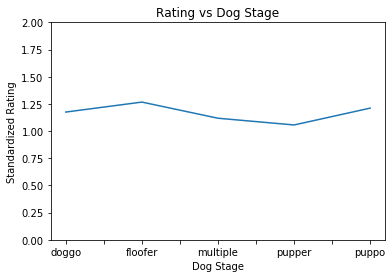

In [145]:
twitter.groupby('dog_stage')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating vs Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Standardized Rating')
plt.show;
plt.savefig('RatingVsDogStage')

* It can be observed that floofer dog stage has the highest avg rating over other dog stages.

##### Relationship between retweet and favorite count.

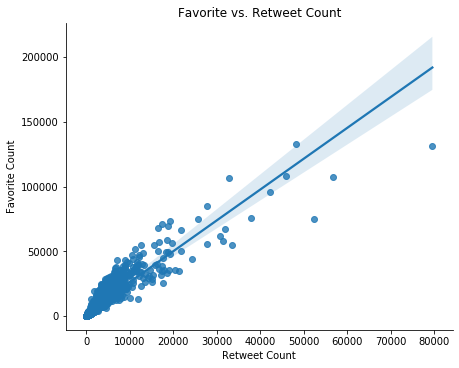

In [146]:
sns.lmplot(x="retweet_count", y="favorite_count", data=twitter,height = 5, aspect=1.3)
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');
plt.savefig('FavVsRetweet')
plt.show()

* Favorite and retweet counts are highly positively correlated. The majority of the data falls below 40000 favorites and 10000 retweets.

##### How did ratings change over the time?

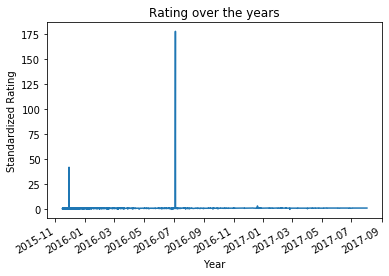

In [147]:
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over the years')
plt.xlabel('Year')
plt.ylabel('Standardized Rating')
plt.show;

In [148]:
# There are some outliers with a rating over 2.  
twitter.loc[twitter['rating'] > 2]

,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
415,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,5927,1655,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN,3.428571
802,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,5569,2772,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN,177.600000
1795,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,7989,4324,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,NaN,42.000000


* I am more interested if the tweets with a standardized rating of below 1 decrease over time therefore I will limit the y axis from 0 to 2.

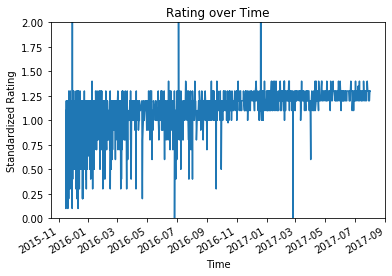

In [149]:
# Plot standardized ratings over time with ylim of 0-2
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;
plt.savefig('RatingVsTime')

* It appears that over the years the count of ratings below 1 decreases. <br>
* Before 2016-11 there many ratings below 1, while after that time the count has decreased.

# References
1. https://stackoverflow.com/questions/3768895/how-to-make-a-class-json-serializable?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
2. https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary
3. https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

4. https://regexone.com/lesson/conditionals
5. https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

6. https://seaborn.pydata.org/generated/seaborn.lmplot.html
7. https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa